## Initial Setup

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8ff43e7c-0245-0743-d6a5-1fc42d3c11ff)


In [2]:
!git clone "https://github.com/akshatjaipuria/ComputerVision101.git"
# !pip install -r "/content/ComputerVision101/requirements.txt"

Cloning into 'ComputerVision101'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 49 (delta 18), reused 36 (delta 12), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [3]:
%cd '/content/ComputerVision101/PyTorch101'

/content/ComputerVision101/PyTorch101


## Diving into setting up the Model and training

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Checking and setting up the device for training

In [5]:
device = torch.device ("cuda:0" if torch.cuda.is_available () else "cpu")
print (f"Device: {device}")

Device: cuda:0


Getting the data loaders for training and validtion

In [6]:
from data_loader.data_loader import GetData
train_loader, valid_loader = GetData (pBatchSize = 512)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

CUDA Available? True


Let's have a look at our data

In [7]:
data_batch = next (iter (train_loader)) 

In [8]:
print(data_batch['input_mnist_image'].shape) # MNIST images
print(data_batch['input_number'].shape) # Numbers to be added to each image's number
print(data_batch['mnist_gt'].shape) # Ground trutch for MNIST images
print(data_batch['sum_gt'].shape) # Ground truth for addition

torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.Size([512])
torch.Size([512])


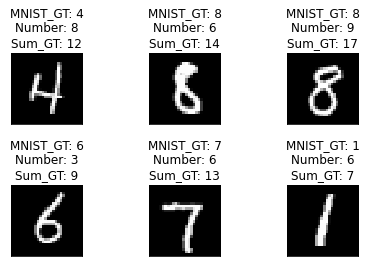

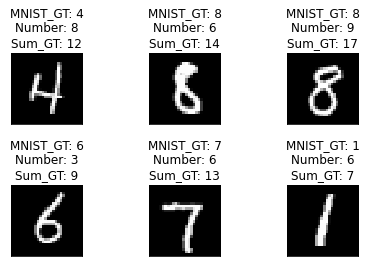

In [9]:
fig = plt.figure()

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(data_batch['input_mnist_image'][i].squeeze(0), cmap='gray', interpolation='none')
  plt.title(f"MNIST_GT: {data_batch['mnist_gt'][i]}\nNumber: {data_batch['input_number'][i]}\nSum_GT: {data_batch['sum_gt'][i]}")
  plt.xticks([])
  plt.yticks([])

fig

Our network

In [10]:
from model.network import Network
net = Network ()

In [14]:
print(net)

Network(
  (Conv3_1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (Conv1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
  (Conv3_4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (Conv1_2): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
  (Fc_1): Linear(in_features=20, out_features=32, bias=True)
  (Fc_2): Linear(in_features=32, out_features=19, bias=True)
)


Training the model

In [12]:
from model.trainer import TrainModel

In [13]:
loss_criterion = nn.CrossEntropyLoss ()
TrainModel (net, train_loader, valid_loader, loss_criterion, 10, 0.01, device)

-------------- Epoch 1 --------------
Training: (MNIST Digit: Loss = 1.086077, Acc = 62.01%)	(Digit Sum: Loss = 2.450404, Acc = 26.71%)
Validation:  (MNIST Digit: Loss = 0.469077, Acc = 85.70%)	(Digit Sum: Loss = 1.885200, Acc = 51.02%)
-------------- Epoch 2 --------------
Training: (MNIST Digit: Loss = 0.335273, Acc = 89.57%)	(Digit Sum: Loss = 1.490475, Acc = 60.20%)
Validation:  (MNIST Digit: Loss = 0.193452, Acc = 93.97%)	(Digit Sum: Loss = 1.164386, Acc = 68.51%)
-------------- Epoch 3 --------------
Training: (MNIST Digit: Loss = 0.166781, Acc = 94.93%)	(Digit Sum: Loss = 1.016835, Acc = 71.66%)
Validation:  (MNIST Digit: Loss = 0.154394, Acc = 95.10%)	(Digit Sum: Loss = 0.962370, Acc = 72.27%)
-------------- Epoch 4 --------------
Training: (MNIST Digit: Loss = 0.120973, Acc = 96.35%)	(Digit Sum: Loss = 0.883255, Acc = 73.85%)
Validation:  (MNIST Digit: Loss = 0.095323, Acc = 97.14%)	(Digit Sum: Loss = 0.824335, Acc = 75.25%)
-------------- Epoch 5 --------------
Training: (MNI